## Skoltech
## Intro to data science, fall 2021
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification tasks and use classification performance metrics


# Submiting the answers

Google form to submit your answers: https://docs.google.com/forms/d/e/1FAIpQLSfAQzhQGmdCYLtaeeaAn2mgNut5HO4U6l3G1KUbBO0qDtA7FA/viewform

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then you must round it up to **3 decimals after the floating point**, e.g. 3.142 for pi or 9.78 for 9.780023

---

If your answer is a ``list of float or integer numbers``, then they should be reported in descending order, divided by a comma, e.g.:

10.453,9.112,5.001,5.000,1.02

If your answer is a ``list of str or letters``, then they should be in alphabetical order , e.g.:

charlie,foxtrot,kilo,uniform

a,c,f

---

The last part (Q5) does not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, you can ask them on piazza:https://piazza.com/class/ku068l4dg0068n

## Dataset
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

#### Attributes

**People**

-   ID: Customer's unique identifier
-   Year_Birth: Customer's birth year
-   Education: Customer's education level
-   Marital_Status: Customer's marital status
-   Kidhome: Number of children in customer's household
-   Teenhome: Number of teenagers in customer's household
-   Dt_Customer: Date of customer's enrollment with the company
-   Recency: Number of days since customer's last purchase
-   Complain: 1 if customer complained in the last 2 years, 0 otherwise


**Products**

-   MntWines: Amount spent on wine in last 2 years
-   MntFruits: Amount spent on fruits in last 2 years
-   MntMeatProducts: Amount spent on meat in last 2 years
-   MntFishProducts: Amount spent on fish in last 2 years
-   MntSweetProducts: Amount spent on sweets in last 2 years
-   MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

-   NumDealsPurchases: Number of purchases made with a discount
-   AcceptedCmp: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Behavior**

-   NumWebPurchases: Number of purchases made through the company’s web site
-   NumCatalogPurchases: Number of purchases made using a catalogue
-   NumStorePurchases: Number of purchases made directly in stores
-   NumWebVisitsMonth: Number of visits to company’s web site in the last month
-   NumDealsPurchases: Number of purchases made with a discount


#### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#### Read the data

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t', index_col='ID')

## 1. Data exploration

Let's take a closer look at the data.

### Q1.1

#### How many columns in the dataset?

In [3]:
pd.set_option('display.max_columns', 35)
pd.set_option('display.max_rows', 80)

In [4]:
df.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,AcceptedCmp
ID,,,,,,,,,,,,,,,,,,,,,,
5524,1963,Graduation,Single,0,0,2018-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1
2174,1960,Graduation,Single,1,1,2020-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0
4141,1971,Graduation,Together,0,0,2019-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0
6182,1990,Graduation,Together,1,0,2020-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0
5324,1987,PhD,Married,1,0,2020-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0


In [5]:
df.shape

(2240, 22)

In [6]:
print('This data set has {} columns.'.format(df.shape[1]))

This data set has 22 columns.


### Q1.2

#### How many unique marital statuses are there?

In [7]:
df.nunique()['Marital_Status']

8

In [8]:
print('There are {} different martial statuses.'.format(df.nunique()['Marital_Status']))

There are 8 different martial statuses.


### Q1.3
#### What is the average age, if we assume now it is 2021? E.g. if we would have two people born in 2001 and 1999, the average age would be 21. Please answer with an integer.

In [9]:
df.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,AcceptedCmp
ID,,,,,,,,,,,,,,,,,,,,,,
5524,1963,Graduation,Single,0,0,2018-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1
2174,1960,Graduation,Single,1,1,2020-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0
4141,1971,Graduation,Together,0,0,2019-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0
6182,1990,Graduation,Together,1,0,2020-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0
5324,1987,PhD,Married,1,0,2020-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0


In [10]:
aver_age = round(df[['Year_Birth']].applymap(lambda x: 2021 - x).sum() / df.shape[0], 0)[0]
print("Average customer's age is {}.".format(aver_age))

Average customer's age is 46.0.


### Q1.4
#### There are some columns related to spendings by category, they are starting with 'Mnt': MntWines, MntFruits, etc. In which category people spent the most on average?

In [11]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'AcceptedCmp'],
      dtype='object')

In [12]:
aver_exp = df[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
print('Most of all people spend money:', aver_exp.apply(sum, axis=0,).map(lambda x: x / df.shape[0]).idxmax())

Most of all people spend money: MntWines


### Q1.5

There are columns describing how customers make their orders, these columns start with num, e.g. 'NumDealsPurchases',
 or 'NumWebPurchases'. Build a histogram for the number of web visits (NumWebVisitsMonth). What is the 'most popular' number of visits, i.e. what number of visits encounters most often in the column?

In [13]:
df.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,AcceptedCmp
ID,,,,,,,,,,,,,,,,,,,,,,
5524,1963,Graduation,Single,0,0,2018-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,1
2174,1960,Graduation,Single,1,1,2020-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0
4141,1971,Graduation,Together,0,0,2019-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0
6182,1990,Graduation,Together,1,0,2020-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0
5324,1987,PhD,Married,1,0,2020-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0


<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Count'>

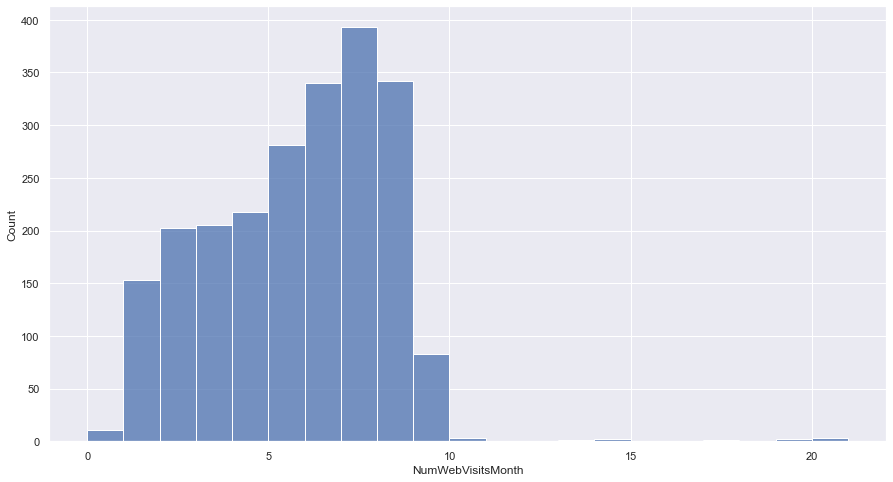

In [14]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(df.NumWebVisitsMonth, bins=range(0,22))

In [15]:
print("The most occurs '7' number of visits")

The most occurs '7' number of visits


### Q1.6 

Let's try to analyze different features together. Build a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for all the 'Num..' columns with 'AcceptedCmp' as a 'hue' argument. The hue argument adds a color marker to the plots and it will allow us to analyze how customers with different behavior patterns react to the marketing proposals. Note, to use the column as hue, it should be passed with the rest of the columns; also you can pass `kind='scatter', plot_kws=dict(alpha=0.2)` arguments to make the dots semi-transparent.

Which of the statements are true, if judged from the plot?
- (a) The people, who don't visit web site don't buy with a discount
- (b) All the people who often visit the website buy a lot online
- (c) People, who buy with a discount, much more often accept marketing campaign
- (d) There is not any clear dependency between web visits and the number of catalog purchases

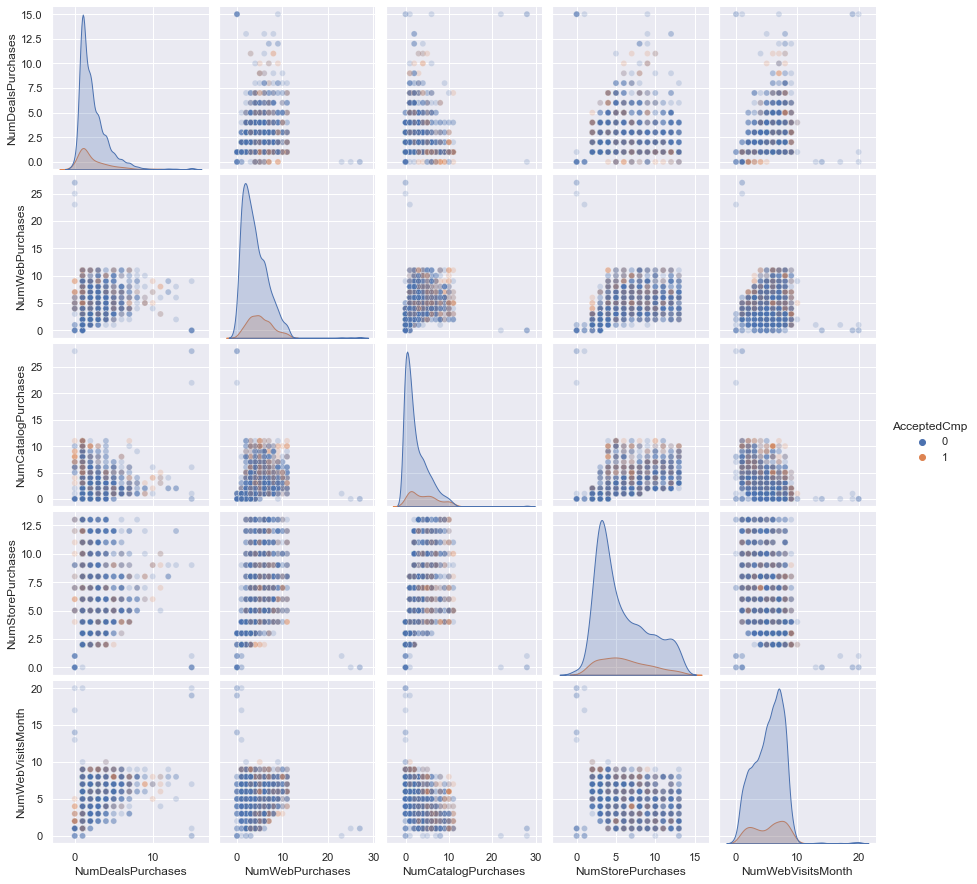

In [16]:
num_col_df = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp']]
sns.pairplot(num_col_df, hue='AcceptedCmp', kind='scatter', plot_kws=dict(alpha=0.2));

In [17]:
print("True statements a in false. Truth of statement b is false. Statement c is false. Statement d is true.")

True statements a in false. Truth of statement b is false. Statement c is false. Statement d is true.


### Q1.7

Build a [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) for teen at home ('Teenhome') and kids at home ('Kidhome'). How many customers have 2 kids and a single teenager?

In [18]:
pd.crosstab(df.Teenhome, df.Kidhome)

Kidhome,0,1,2
Teenhome,,,
0,638,503,17
1,625,374,31
2,30,22,0


In [19]:
print(f'{pd.crosstab(df.Teenhome, df.Kidhome).loc[1, 2]} customers have 2 kids and 1 teenager at home')

31 customers have 2 kids and 1 teenager at home


### Q1.8
There is a 'Dt_Customer' column with a customer registration date. In which month there were a maximum number of registrations? Answer with the name, i.e. 'January'. Hint: you probably want to convert the column to datetime from string.

In [20]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
df.dtypes

Year_Birth                      int64
Education                      object
Marital_Status                 object
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue                       int64
AcceptedCmp                     int64
dtype: object

In [21]:
print('Months number with the most occurs of registrations is {}.'.format(df.groupby(df.Dt_Customer.dt.month).count().iloc[:, 0].idxmax()))
print('Hence, the most occurs August.')

Months number with the most occurs of registrations is 8.
Hence, the most occurs August.


## 2. Preprocessing
The goal of the segment is to prepare data for further work

### Q2.1
There are two columns, that has the same value for all the people and they don't have a description in the sections above. Let's drop them. As an answer, write the names of these columns divided by a comma.

In [22]:
df.drop(labels=['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)
print("This two column are ['Z_CostContact', 'Z_Revenue'].")

This two column are ['Z_CostContact', 'Z_Revenue'].


### Q2.2
As we could see before, there are some strange rare marital statuses. We going to leave only three options - 'Married', 'Together' and 'Single'. All other options should be changed to 'Single'. How many people are now in this category?

In [23]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [24]:
df.Marital_Status.replace(to_replace=['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], value='Single', inplace=True)
df.Marital_Status.value_counts()

Married     864
Single      796
Together    580
Name: Marital_Status, dtype: int64

### Q2.3

Now it's time to talk about the task for today. Our big retail company "Y6" want to launch a marketing campaign, but we want to make the marketing proposal only to people, who would accept it with the high probability. So we need to build a model that would predict it.

Let's divide the dataset into a target (the 'AcceptedCmp' column) and data (the rest of the columns). How many positive labels are there in target?


In [25]:
y = df[['AcceptedCmp']]
X = df.drop(labels='AcceptedCmp', axis=1)


In [26]:
print(f"In target are {y[y.AcceptedCmp != 0].count()[0]} positive labels.")

In target are 334 positive labels.


### Q2.4

To honestly estimate the performance of the model, we need to split the dataset into train and test parts. In reality, a test could be millions of customers and a train could be a small playground to estimate the campaign. Our current dataset is not that big, so let's say the test would be just 30% of the dataset. Use `train_test_split` to make a split. Please set the `random_state` argument to 42 and don't forget to shuffle and stratify.
How many positive labels do you have in test targets?

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, shuffle=True, stratify=y)

In [28]:
print('There are {} positive labels in the test set.'.format(y_test[y_test.AcceptedCmp != 0].count()[0]))

There are 100 positive labels in the test set.


## 3. Basic models

Let's start with the most basic models. We going to use logistic regression, and classifier, and random forest without any modification or param tuning. This way we could be sure our future modification would indeed make the model stronger.

Some of the features are not usable in the current form, e.g. `Dt_Customer` as a date or `Education` as categorical, so let's make a copy of x with the following columns for the section:

'Year_Birth', 'Kidhome',
'Teenhome',  'Recency', 'MntWines', 'MntFruits',
'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain'

In [29]:
X_train_q3 = X_train[['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                      'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain']]
X_test_q3 = X_test[['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']]

### Q3.1

Build a logistic regression model. Set max_iter parameter to 5000. What is the f1_score for the model?


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_q3, y_train.values.ravel())

print('lr f1 for train: ', round(f1_score(y_train, lr.predict(X_train_q3)), 3))
print('F1-score for the logistic regression is ', round(f1_score(y_test, lr.predict(X_test_q3)), 3))

lr f1 for train:  0.327
F1-score for the logistic regression is  0.271


### Q3.2

Build a k-neighbors classifier. What is the f1_score for the model?

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_q3.values, y_train.values.ravel())

print('knn f1 for train: ', round(f1_score(y_train, knn.predict(X_train_q3.values)), 3))
print('F1-score for the k-neighbour classifier is ', round(f1_score(y_test, knn.predict(X_test_q3.values)), 3))

knn f1 for train:  0.451
F1-score for the k-neighbour classifier is  0.267


### Q3.3

Build a random forest classifier. What is the f1_score for the model?

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_q3, y_train.values.ravel())

print('rfc f1 for train: ', round(f1_score(y_train, rfc.predict(X_train_q3)), 3))
print('F1-score for the random forest classifier is ', round(f1_score(y_test, rfc.predict(X_test_q3)), 3))

rfc f1 for train:  0.983
F1-score for the random forest classifier is  0.397


### Q3.4

The models without fine-tuning are not as effective. First, let's try to regularize the regression with the L2 norm. Use 5-split cross-validation grid search to find the optimal C. What is the f1 score for the model trained on the full train dataset with this regularization?

In [33]:
from sklearn.model_selection import GridSearchCV

hyper_param_lr = [{'C': 10 ** np.linspace(-2, 2, 50)}]
grid_lr = GridSearchCV(estimator=lr, param_grid=hyper_param_lr, cv=5)
grid_lr.fit(X_train_q3, y_train.values.ravel())


print('lr f1 for train with best etimator: ', round(f1_score(y_train, grid_lr.predict(X_train_q3)), 3))
print('Best estimator for logistic regression with parameter tunning is', grid_lr.best_estimator_)
print('F1-score for the logistic regression with regularization is', round(f1_score(y_test, grid_lr.predict(X_test_q3)), 3))

lr f1 for train with best etimator:  0.33
Best estimator for logistic regression with parameter tunning is LogisticRegression(C=0.012067926406393288, max_iter=5000)
F1-score for the logistic regression with regularization is 0.271


In [34]:
grid_lr.best_params_

{'C': 0.012067926406393288}

### Q3.5

Fine-tune a k-NN classifier, try to find an optimal number of neighbors, weights, and p with a 5-split cross-validation. What is the f1 score for a model trained on a full train dataset with these parameters?

In [35]:
hyper_param_knn = [{'n_neighbors': list(range(2, 27, 2)),
                    'weights': ['uniform', 'distance'],
                    'p': list(range(1, 6))}]

grid_knn = GridSearchCV(knn, hyper_param_knn, cv=5)
grid_knn.fit(X_train_q3.values, y_train.values.ravel())

print('knn f1 for train with best etimator: ', round(f1_score(y_train, grid_knn.predict(X_train_q3.values)), 3))
print('Best estimator for k-NN with parameter tunning is', grid_knn.best_estimator_)
print('F1-score for the k-NN classifier with parameter tunning is', round(f1_score(y_test, grid_knn.predict(X_test_q3.values)), 3))

knn f1 for train with best etimator:  0.983
Best estimator for k-NN with parameter tunning is KNeighborsClassifier(n_neighbors=20, weights='distance')
F1-score for the k-NN classifier with parameter tunning is 0.217


### Q3.6

Use the 5-split CV to find the optimal number of estimators and max_features for the random forest. What is the f1 score for random forest trained on a full train dataset with these parameters?

In [36]:
hyper_param_rfc = [{'n_estimators': list(range(50, 150, 5)),
                    'max_features': ['auto', 'sqrt', 'log2']}]

grid_rfc = GridSearchCV(rfc, hyper_param_rfc, cv=5)
grid_rfc.fit(X_train_q3, y_train.values.ravel())

print('rfc f1 for train with best etimator: ', round(f1_score(y_train, grid_rfc.predict(X_train_q3)), 3))
print('Best estimator for random forest classifier with parameter tunning is', grid_rfc.best_estimator_)
print('F1-score for the random forest classifier with parameter tunning is', round(f1_score(y_test, grid_rfc.predict(X_test_q3)), 3))

rfc f1 for train with best etimator:  0.983
Best estimator for random forest classifier with parameter tunning is RandomForestClassifier(n_estimators=125)
F1-score for the random forest classifier with parameter tunning is 0.373


## 4. Working with features

Machine learning is sometimes called data science because everything depends on data. In this section, we'll apply some of the most popular modifications for data. IMPORTANT: In the previous section we took a subset of the columns; now it's time to work with all of them.

### Q4.1

One of the standard procedures is data standardizations - it strongly influences the results of k-NN and make the convergence of other algorithms (i.e. logreg and neural nets) much faster. Let's apply `StandardScaler` for all the numerical columns - 'Recency', 'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'. 

What is the maximum value of MntWines now in the test set?

In [37]:
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline

#pipeline = make_pipeline()
col = ['Recency', 'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

scaler = StandardScaler()
scaler.fit(X_train[col])

X_train[col] = scaler.transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])
print('The maximum value of MntWines now is', round(X_test.MntWines.max(), 3))

The maximum value of MntWines now is 3.445


### Q4.2
We have two categorical columns - education and marital status. We can't use them directly with our models, so let's use one-hot encoding - create a separate binary column for each possible value and drop the original 'Education' and 'Marital_Status' columns.

How many columns do we have now?

In [38]:
X_train = pd.get_dummies(X_train, columns=['Education', 'Marital_Status'])
X_test = pd.get_dummies(X_test, columns=['Education', 'Marital_Status'])

In [39]:
print("Now it's {} columns".format(X_train.shape[1]))

Now it's 25 columns


### Q4.3 
We have a datetime column - customer registration date `Dt_Customer`. We can't use it directly, but we could use some derivative features. Let's create new columns 'recent_customer' with value `1` if a user was registered after `01/06/2020` and `0` otherways. The original `Dt_Customer` column should be dropped. How many recent customers do we have in the train set?

Hints: you can use `pd.to_datetime` for the column and `datetime.datetime` to create a new date.

In [40]:
def _cust_recency(year, month, day):
    if year > 2020:
        return 1
    elif year == 2020:
        if month > 6:
            return 1
        elif month == 6:
            if day > 1:
                return 1
            else:
                return 0
        else:
            return 0
    else:
        return 0

X_train['recent_customer'] = X_train['Dt_Customer'].map(lambda x: _cust_recency(x.year, x.month, x.day))
X_test['recent_customer'] = X_test['Dt_Customer'].map(lambda x: _cust_recency(x.year, x.month, x.day))

X_train['recent_customer'].sum()

112

In [41]:
X_train.drop(labels='Dt_Customer', axis=1, inplace=True)
X_test.drop(labels='Dt_Customer', axis=1, inplace=True)

### Q4.4

To check the effects of the modification, train the logistic regression with an optimal C. What is the f1 score now?

In [42]:
X_test.head()

,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,recent_customer
ID,,,,,,,,,,,,,,,,,,,,,,,,,
3277,-1.180644,0,1,-1.380490,-0.250973,-0.584303,-0.300494,-0.215586,-0.647530,-0.512670,-0.166627,1.002856,-0.565230,-0.231684,1.050564,0,0,0,1,0,0,0,1,0,0
4943,-1.349955,0,0,0.811900,3.198425,0.177726,0.207823,-0.683659,0.144064,0.411813,-0.686053,-0.751359,0.478681,0.998733,0.248576,0,0,0,1,0,0,1,0,0,0
1071,0.597124,0,1,-1.346234,0.679770,1.574779,-0.002515,0.558535,0.407928,1.675902,0.352799,1.002856,0.130711,2.229150,-0.152419,0,0,0,0,0,1,0,1,0,0
3697,-1.265299,0,1,-1.003673,-0.697016,-0.457298,-0.624766,-0.467625,-0.479616,-0.607005,-0.166627,-0.400516,-0.913200,-0.539288,0.649570,0,0,0,1,0,0,0,0,1,0
9986,1.105058,1,0,-1.414746,-0.854618,-0.660506,-0.637912,-0.629650,-0.599554,-0.644739,0.352799,-0.049673,-0.565230,-1.154497,0.649570,0,0,0,1,0,0,0,0,1,0


In [43]:
grid_lr.best_params_

{'C': 0.012067926406393288}

In [44]:
lr_opt = LogisticRegression(C=0.012067926406393288, max_iter=5000)
lr_opt.fit(X_train, y_train.values.ravel())

print('Now train f1-score is ', f1_score(y_train, lr_opt.predict(X_train)))
print('Now test f1-score is ', round(f1_score(y_test, lr_opt.predict(X_test)), 3))

Now train f1-score is  0.17424242424242425
Now test f1-score is  0.222


### Q4.5

Another popular metric for unbalanced classification tasks is the ROC curve. Train a k-NN and random forest with optimal params and build a roc-curve for both of them on the sample plot. What is the difference between them on FPR 0.7 (approximately)?

In [45]:
print(grid_knn.best_params_)
print(grid_rfc.best_params_)

{'n_neighbors': 20, 'p': 2, 'weights': 'distance'}
{'max_features': 'auto', 'n_estimators': 125}


In [46]:
knn_opt = KNeighborsClassifier(n_neighbors=20, p=2, weights='distance')
knn_opt.fit(X_train.values, y_train.values.ravel())

rfc_opt = RandomForestClassifier(n_estimators=145, max_features='sqrt')
rfc_opt.fit(X_train, y_train.values.ravel());

The difference between two roc-curves on FPR=0.7 is apporximately 0.05.


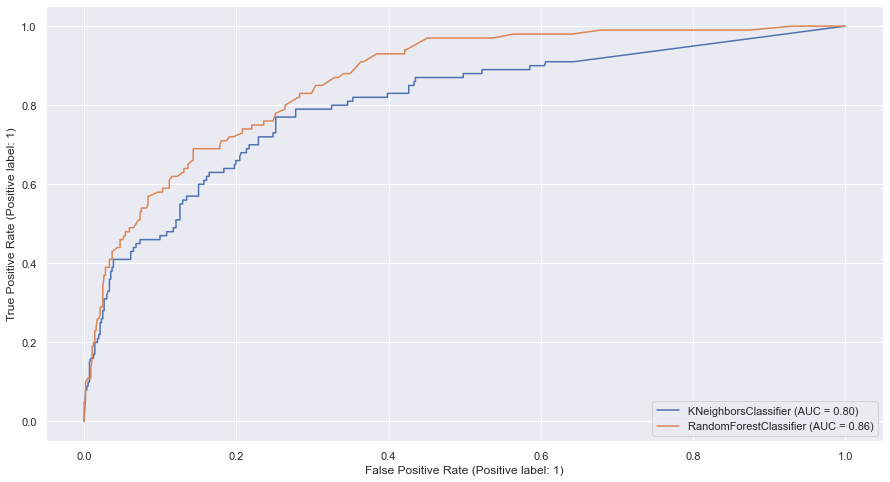

In [47]:
from sklearn.metrics import RocCurveDisplay

roc_curve_knn = RocCurveDisplay.from_estimator(knn_opt, X_test.values, y_test)
roc_curve_rfc = RocCurveDisplay.from_estimator(rfc_opt, X_test, y_test, ax=roc_curve_knn.ax_)

print('The difference between two roc-curves on FPR=0.7 is apporximately 0.05.')

### Q5.1 (2 points)

Propose two derivative features and retrain one of the models with them. What is the performance?

In [48]:
X_train.head()

,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,recent_customer
ID,,,,,,,,,,,,,,,,,,,,,,,,,
10821,0.766436,1,1,-0.147271,-0.360997,-0.558902,-0.594091,-0.683659,-0.599554,-0.040995,1.911077,-0.049673,-0.565230,-0.231684,0.649570,0,0,0,1,0,0,1,0,0,0
5680,1.274370,1,0,0.572107,-0.872459,-0.558902,-0.708024,-0.683659,-0.503604,-0.776808,-0.686053,-1.102202,-0.913200,-0.846893,0.248576,0,1,0,0,0,0,1,0,0,0
4084,0.512469,0,1,-0.284295,-0.236105,3.276643,-0.059482,2.772880,1.583325,0.185409,-0.166627,0.652013,0.478681,1.613941,-0.553413,0,0,0,1,0,0,0,0,1,0
6983,-1.603922,1,1,-0.866649,-0.833802,-0.609704,-0.664204,-0.647653,-0.623542,-0.833409,-0.166627,-0.751359,-0.913200,-0.846893,0.649570,0,0,0,0,1,0,0,1,0,0
8233,-1.603922,0,1,-1.380490,0.608403,-0.533501,-0.646676,-0.557639,-0.527591,-0.644739,0.872225,1.002856,0.130711,0.383524,-0.152419,0,0,0,0,1,0,0,1,0,0


<AxesSubplot:>

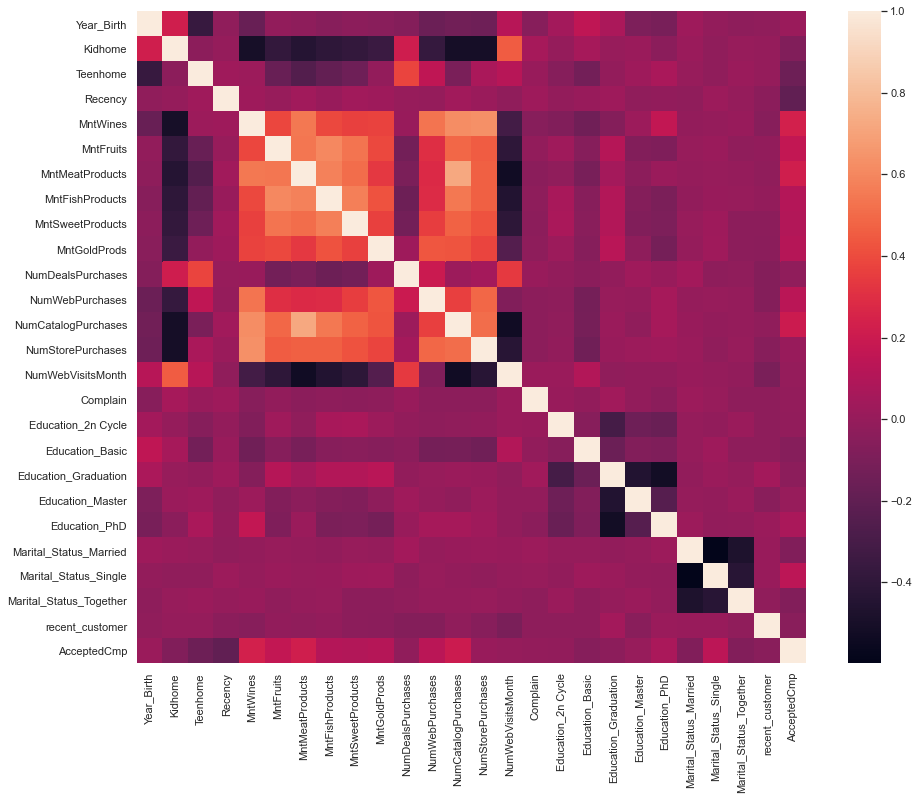

In [49]:
# Firstly, I will check the correlation. I see there a lack of contribution from some 'Mnt..' and 'Num..' features. Will elaborate this.
# Also education features looks not really important.

a = pd.concat([X_train, y_train], axis=1)
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(a.corr())

In [50]:
a.corr()

,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,recent_customer,AcceptedCmp
Year_Birth,1.000000,0.223050,-0.365853,-0.021369,-0.169033,-0.015432,-0.030052,-0.054661,-0.033201,-0.044989,-0.063885,-0.155647,-0.133885,-0.145028,0.120694,-0.052187,0.050421,0.153260,0.079970,-0.090316,-0.106508,0.029727,-0.006692,-0.026155,-0.020125,0.015233
Kidhome,0.223050,1.000000,-0.031733,-0.000206,-0.499172,-0.383478,-0.436957,-0.401180,-0.381126,-0.349687,0.216843,-0.370335,-0.506267,-0.508712,0.454755,0.057315,0.000146,0.057858,0.004891,0.014829,-0.041438,0.015998,-0.018347,0.002196,0.000328,-0.074113
Teenhome,-0.365853,-0.031733,1.000000,0.032242,0.024762,-0.169160,-0.248909,-0.192668,-0.146081,-0.009979,0.380839,0.154265,-0.101017,0.072425,0.121731,0.009894,-0.060165,-0.125504,-0.011436,0.029325,0.075698,0.005847,-0.020513,0.016037,-0.004505,-0.150057
Recency,-0.021369,-0.000206,0.032242,1.000000,0.029348,0.005436,0.038573,0.007839,0.039561,0.030239,0.002582,0.000740,0.043888,0.018472,-0.022534,0.027655,-0.009960,0.007482,0.030976,-0.023388,-0.012025,-0.021244,0.021701,0.000023,-0.037113,-0.193687
MntWines,-0.169033,-0.499172,0.024762,0.029348,1.000000,0.383836,0.547425,0.389240,0.364421,0.375154,0.010195,0.535966,0.624069,0.633251,-0.311542,-0.051448,-0.079649,-0.139826,-0.064844,0.024137,0.163927,-0.010251,0.000076,0.011482,-0.053753,0.236946
MntFruits,-0.015432,-0.383478,-0.169160,0.005436,0.383836,1.000000,0.541432,0.606400,0.536296,0.391054,-0.124876,0.295772,0.491499,0.455005,-0.399344,-0.014032,0.033943,-0.055455,0.119090,-0.068189,-0.084108,0.005037,0.014541,-0.021727,-0.011785,0.166318
MntMeatProducts,-0.030052,-0.436957,-0.248909,0.038573,0.547425,0.541432,1.000000,0.576502,0.512772,0.333757,-0.093534,0.280724,0.719246,0.469194,-0.526040,-0.039604,-0.019122,-0.108968,0.052736,-0.031700,0.019474,-0.003240,0.006402,-0.003409,-0.018288,0.221982
MntFishProducts,-0.054661,-0.401180,-0.192668,0.007839,0.389240,0.606400,0.576502,1.000000,0.570431,0.421041,-0.150480,0.284894,0.545583,0.465616,-0.450214,-0.024517,0.067598,-0.055000,0.104677,-0.062864,-0.094875,-0.012389,0.007294,0.005928,-0.007276,0.111998
MntSweetProducts,-0.033201,-0.381126,-0.146081,0.039561,0.364421,0.536296,0.512772,0.570431,1.000000,0.363612,-0.127468,0.356255,0.471417,0.425395,-0.410274,-0.031344,0.070120,-0.048799,0.106618,-0.078519,-0.086946,0.001206,0.031902,-0.036562,-0.031801,0.104173
MntGoldProds,-0.044989,-0.349687,-0.009979,0.030239,0.375154,0.391054,0.333757,0.421041,0.363612,1.000000,0.028500,0.434052,0.430700,0.376699,-0.245664,-0.030024,0.021843,-0.059008,0.129354,-0.027710,-0.123981,-0.003080,0.032134,-0.031982,-0.042439,0.113753


In [51]:
# Correaltion between 'Mnt..' features and target.

mnt_feat_corr = pd.concat([X_train[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']], y_train], axis=1)
mnt_feat_corr.corr()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp
MntWines,1.000000,0.383836,0.547425,0.389240,0.364421,0.375154,0.236946
MntFruits,0.383836,1.000000,0.541432,0.606400,0.536296,0.391054,0.166318
MntMeatProducts,0.547425,0.541432,1.000000,0.576502,0.512772,0.333757,0.221982
MntFishProducts,0.389240,0.606400,0.576502,1.000000,0.570431,0.421041,0.111998
MntSweetProducts,0.364421,0.536296,0.512772,0.570431,1.000000,0.363612,0.104173
MntGoldProds,0.375154,0.391054,0.333757,0.421041,0.363612,1.000000,0.113753
AcceptedCmp,0.236946,0.166318,0.221982,0.111998,0.104173,0.113753,1.000000


In [52]:
# I will leave the 'MntWines' and 'MntMeatProducts' beacuse I like that correaltion is higher than 0.2.
# Other feature I will drop.

X_train.drop(labels=['MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)
X_test.drop(labels=['MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

In [53]:
# Connection between web purchases, visiting a site, and target.
# UPD: looks like it's pretty useless.

# Site visits per web purchase.
X_train['site_vis_buy'] = X_train[['NumWebVisitsMonth', 'NumWebPurchases']].apply(lambda x: x[0] / x[1], axis=1)
pd.concat([X_train[['site_vis_buy']], y_train], axis=1).sort_values(by='site_vis_buy')[:80]

X_train.drop(labels='site_vis_buy', axis=1, inplace=True)

In [54]:
# I assume, that may be people, who have 2 or more cildren (teens or kids, whatever) may pay more attention to expenses.

def _large_fam(num_teen, num_kids):
    if (num_teen + num_kids) >= 2:
        return 1
    else:
        return 0
    
X_train['large_fam'] = X_train[['Teenhome', 'Kidhome']].apply(lambda x: _large_fam(x[0], [1]), axis=1)
pd.concat([X_train[['large_fam']], y_train], axis=1).corr()

,large_fam,AcceptedCmp
large_fam,1.000000,-0.157494
AcceptedCmp,-0.157494,1.000000


In [55]:
# Ok. It's a bit high than corr between 'Teenhome' and target. And now it really better than the corr between 'Kidhome' and target.
# Will drop inital 'Teenhome' and 'Kidhome' and leave created.

X_test['large_fam'] = X_test[['Teenhome', 'Kidhome']].apply(lambda x: _large_fam(x[0], [1]), axis=1)

X_train.drop(labels=['Kidhome', 'Teenhome'], axis=1, inplace=True)
X_test.drop(labels=['Kidhome', 'Teenhome'], axis=1, inplace=True)

In [56]:
# Let's look for a connection between age and recency.
# UPD: for me it's evenly distributed.

df_age_rec = pd.concat([X_train[['Year_Birth', 'Recency']], y_train], axis=1)
df_age_rec.sort_values(by='Year_Birth', ascending=False)[:80]

,Year_Birth,Recency,AcceptedCmp
ID,,,
9909,2.290237,-0.866649,1
193,2.290237,1.085949,0
8315,2.205581,0.537851,0
5184,2.205581,0.537851,0
6905,2.120926,0.195290,0
5067,2.120926,-1.311978,0
10619,2.120926,-0.695368,1
4483,2.036270,0.606363,0
7734,2.036270,0.298059,1


In [57]:
# Correaltion between 'Num..' features and target.

num_feat_corr = pd.concat([X_train[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']], y_train], axis=1)
num_feat_corr.corr()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp
NumDealsPurchases,1.000000,0.199761,0.024546,0.053818,0.342559,-0.022373
NumWebPurchases,0.199761,1.000000,0.361452,0.489483,-0.079798,0.137440
NumCatalogPurchases,0.024546,0.361452,1.000000,0.507104,-0.524777,0.206711
NumStorePurchases,0.053818,0.489483,0.507104,1.000000,-0.425966,0.007572
NumWebVisitsMonth,0.342559,-0.079798,-0.524777,-0.425966,1.000000,0.000758
AcceptedCmp,-0.022373,0.137440,0.206711,0.007572,0.000758,1.000000


In [58]:
# The same situatuion as with 'Mnt..' features. Will leave 'NumCatalogPurchases', and other will be dropped.

X_train.drop(labels=['NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'], axis=1, inplace=True)
X_test.drop(labels=['NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'], axis=1, inplace=True)

In [59]:
# If it was a lot of time since a last purchase, custmer would not accept the offer. If a customer shopped recent, it's approx 50|50 distribution of acceptance.
# Just an observation.

pd.concat([X_train[['Recency']], y_train], axis=1).sort_values(by='Recency', ascending=False)[:80]

,Recency,AcceptedCmp
ID,,
2415,1.702558,0
3363,1.702558,0
9977,1.702558,0
4070,1.702558,1
7212,1.702558,0
22,1.702558,0
10142,1.702558,0
528,1.702558,0
2831,1.702558,0


In [60]:
X_train.columns

Index(['Year_Birth', 'Recency', 'MntWines', 'MntMeatProducts',
       'NumCatalogPurchases', 'Complain', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'recent_customer', 'large_fam'],
      dtype='object')

In [61]:
# Eduction looks like not really imporant, but I do not want to waste it. Out of this 5 features I will create one categorical 'edu_degree'.
# If a person's education is 'Education_2n Cycle', 'Education_Basic' or 'Education_Graduation', then it's 0. Otherwise it's 1.

def _edu_degree(cycle, basic, grad):
    if (cycle == 1) or (basic == 1) or (grad == 1):
        return 0
    else:
        return 1
    
X_train['edu_degree'] = X_train[['Education_2n Cycle', 'Education_Basic', 'Education_Graduation']].apply(lambda x: _edu_degree(x[0], x[1], x[2]), axis=1)
X_train.drop(labels=['Education_2n Cycle', 'Education_Basic', 'Education_Graduation'], axis=1, inplace=True)

X_test['edu_degree'] = X_test[['Education_2n Cycle', 'Education_Basic', 'Education_Graduation']].apply(lambda x: _edu_degree(x[0], x[1], x[2]), axis=1)
X_test.drop(labels=['Education_2n Cycle', 'Education_Basic', 'Education_Graduation'], axis=1, inplace=True)

X_train.drop(labels=['Education_Master', 'Education_PhD'], axis=1, inplace=True)
X_test.drop(labels=['Education_Master', 'Education_PhD'], axis=1, inplace=True)

In [62]:
#It looks a bit better for me now.

b = pd.concat([X_train, y_train], axis=1)
b.corr()

,Year_Birth,Recency,MntWines,MntMeatProducts,NumCatalogPurchases,Complain,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,recent_customer,large_fam,edu_degree,AcceptedCmp
Year_Birth,1.000000,-0.021369,-0.169033,-0.030052,-0.133885,-0.052187,0.029727,-0.006692,-0.026155,-0.020125,-0.373770,-0.160176,0.015233
Recency,-0.021369,1.000000,0.029348,0.038573,0.043888,0.027655,-0.021244,0.021701,0.000023,-0.037113,0.014584,-0.028317,-0.193687
MntWines,-0.169033,0.029348,1.000000,0.547425,0.624069,-0.051448,-0.010251,0.000076,0.011482,-0.053753,0.013417,0.157416,0.236946
MntMeatProducts,-0.030052,0.038573,0.547425,1.000000,0.719246,-0.039604,-0.003240,0.006402,-0.003409,-0.018288,-0.266616,-0.008116,0.221982
NumCatalogPurchases,-0.133885,0.043888,0.624069,0.719246,1.000000,-0.035309,0.011753,-0.007667,-0.004800,-0.019757,-0.110423,0.033936,0.206711
Complain,-0.052187,0.027655,-0.051448,-0.039604,-0.035309,1.000000,0.021720,0.004469,-0.029435,-0.028161,0.003499,-0.042453,-0.006906
Marital_Status_Married,0.029727,-0.021244,-0.010251,-0.003240,0.011753,0.021720,1.000000,-0.598595,-0.467702,0.008682,0.001765,0.016620,-0.075137
Marital_Status_Single,-0.006692,0.021701,0.000076,0.006402,-0.007667,0.004469,-0.598595,1.000000,-0.428074,0.012206,-0.021200,-0.020022,0.142885
Marital_Status_Together,-0.026155,0.000023,0.011482,-0.003409,-0.004800,-0.029435,-0.467702,-0.428074,1.000000,-0.023264,0.021401,0.003342,-0.072890
recent_customer,-0.020125,-0.037113,-0.053753,-0.018288,-0.019757,-0.028161,0.008682,0.012206,-0.023264,1.000000,-0.000354,-0.024642,-0.046663


<AxesSubplot:>

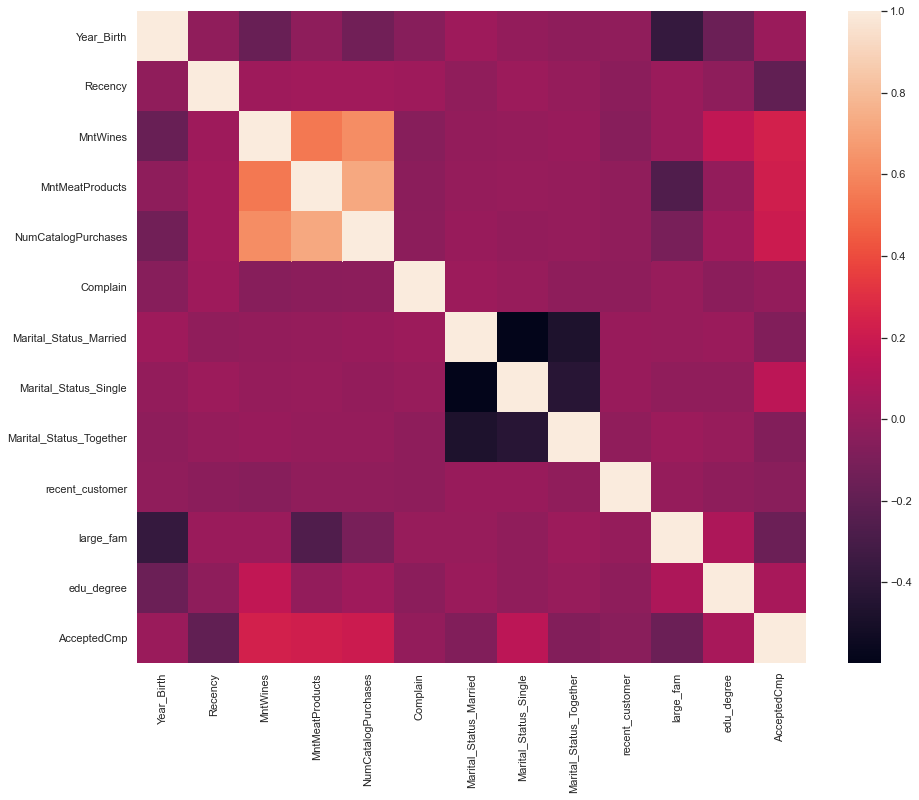

In [63]:
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(b.corr())

In [64]:
# I will retrain RandomForestClassifier

grid_rfc_2 = GridSearchCV(rfc, hyper_param_rfc, cv=5)
grid_rfc_2.fit(X_train, y_train.values.ravel())

print('Best estimator for random forest classifier with new feaetures is', grid_rfc_2.best_estimator_)
print('F1-score for the random forest classifier with new feaetures is', round(f1_score(y_test, grid_rfc_2.predict(X_test)), 3))

Best estimator for random forest classifier with new feaetures is RandomForestClassifier(max_features='sqrt', n_estimators=130)
F1-score for the random forest classifier with new feaetures is 0.392


In [65]:
print('f1_score has grown a little bit.')

f1_score has grown a little bit.


### Q5.2

Train an xboost model with f1 score 0.47+

In [66]:
# I will drop all the features with bad correaltion with target.

X_train.drop(labels=['Year_Birth', 'Complain', 'recent_customer', 'edu_degree'], axis=1, inplace=True)
X_test.drop(labels=['Year_Birth', 'Complain', 'recent_customer', 'edu_degree'], axis=1, inplace=True)

<AxesSubplot:>

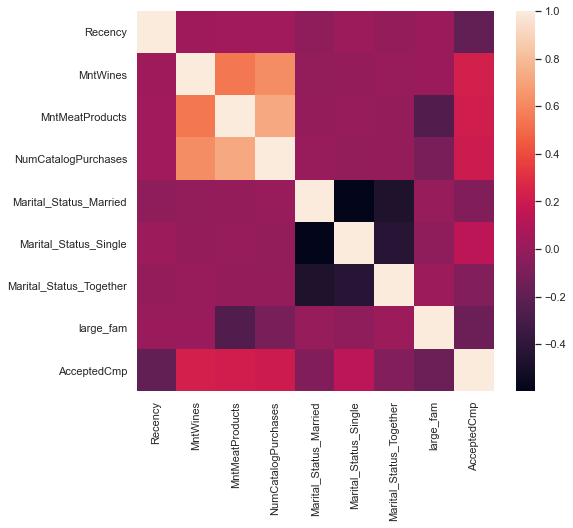

In [67]:
sns.set(rc = {'figure.figsize':(8,7)})

sns.heatmap((pd.concat([X_train, y_train], axis=1).corr()))

In [68]:
X_train.head()

,Recency,MntWines,MntMeatProducts,NumCatalogPurchases,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,large_fam
ID,,,,,,,,
10821,-0.147271,-0.360997,-0.594091,-0.565230,1,0,0,1
5680,0.572107,-0.872459,-0.708024,-0.913200,1,0,0,0
4084,-0.284295,-0.236105,-0.059482,0.478681,0,0,1,1
6983,-0.866649,-0.833802,-0.664204,-0.913200,0,1,0,1
8233,-1.380490,0.608403,-0.646676,0.130711,0,1,0,1


In [69]:
from xgboost import XGBClassifier

xg_boost = XGBClassifier(verbose=3, n_estimators=1000, use_label_encoder=False, eval_metric='mlogloss')


xg_boost.fit(X_train.values, y_train)
y_pred = xg_boost.predict(X_test.values)

[20:38:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [70]:
f1_score(y_test, y_pred)

0.5269461077844311

In [71]:
print('f1_score is higher than 0.47.')

f1_score is higher than 0.47.
